**Problem 2 (50 points)**

Consider the continuous signal x(t) = 2 cos(5t) + 7 sin(10t), which is 
sampled at a frequency of 20 samples per second. Assuming a granularity 
of h= 0.01 seconds:

a) Write a routine to extrapolate the signal with zero order holder.

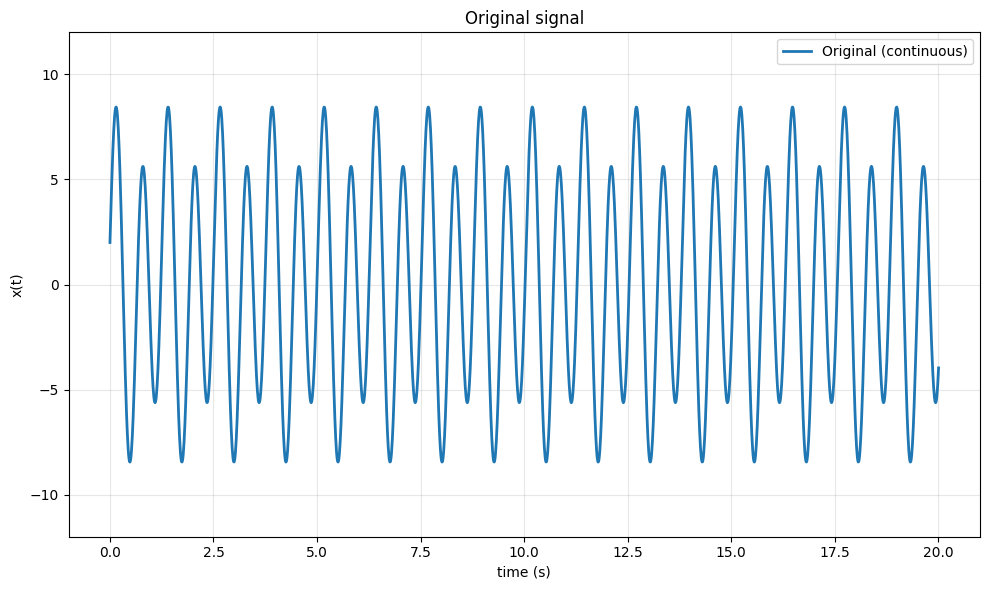

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Continuous-time signal
def x_true(t):
    return 2*np.cos(5*t) + 7*np.sin(10*t) # original signal

fs = 20.0                  # samples per second
Ts = 1.0/fs                # sampling interval
h  = 0.01                  # granularity
T_end = 20.0               # total duration (seconds)

# Time grids
t_cont = np.arange(0.0, T_end + h, h)      # "continuous" grid for display
t_s    = np.arange(0.0, T_end + Ts, Ts)    # sampling instants

# Samples
x_s = x_true(t_s) # sampled signal
x_c = x_true(t_cont) # continuous signal for display

# (b) Plot: original signal
plt.figure(figsize=(10, 6))
plt.plot(t_cont, x_c, label="Original (continuous)", lw=2)
plt.xlabel("time (s)")
plt.ylabel("x(t)")
plt.title("Original signal")
plt.grid(True, alpha=0.3)
plt.ylim(-12, 12)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

b) Show the graph of the original signal and its zero-order approximation.

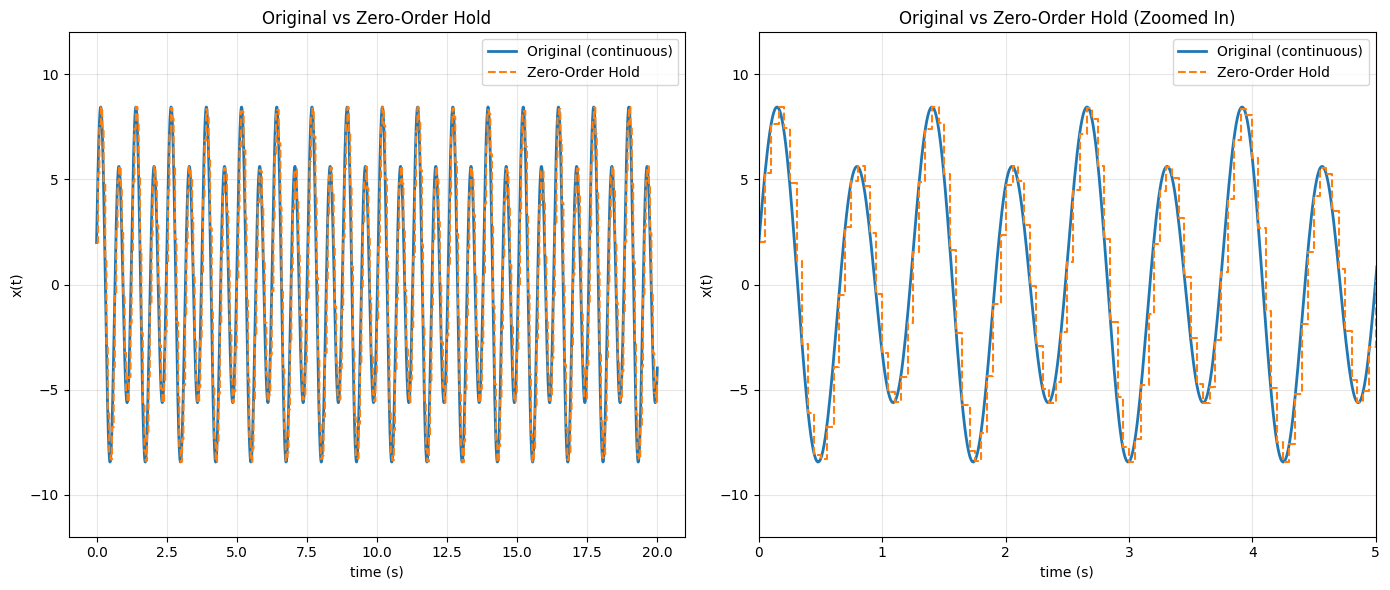

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Zero-Order Hold routine
def zoh_reconstruct(t_eval, t_samples, x_samples):
    idx = np.searchsorted(t_samples, t_eval, side="right") - 1
    idx = np.clip(idx, 0, len(x_samples)-1)
    return x_samples[idx]

x_zoh = zoh_reconstruct(t_cont, t_s, x_s)


fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot 1: Full view
axs[0].plot(t_cont, x_c, label="Original (continuous)", lw=2)
axs[0].step(t_cont, x_zoh, where="post", label="Zero-Order Hold", linestyle="--")
axs[0].set_xlabel("time (s)")
axs[0].set_ylabel("x(t)")
axs[0].set_title("Original vs Zero-Order Hold")
axs[0].grid(True, alpha=0.3)
axs[0].set_ylim(-12, 12)
axs[0].legend(loc='upper right')

# Plot 2: Zoomed-in view
axs[1].plot(t_cont, x_c, label="Original (continuous)", lw=2)
axs[1].step(t_cont, x_zoh, where="post", label="Zero-Order Hold", linestyle="--")
axs[1].set_xlabel("time (s)")
axs[1].set_ylabel("x(t)")
axs[1].set_title("Original vs Zero-Order Hold (Zoomed In)")
axs[1].grid(True, alpha=0.3)
axs[1].set_ylim(-12, 12)
axs[1].set_xlim(0, 5)
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

c) Show the graph of the original signal and its second-order approximation.

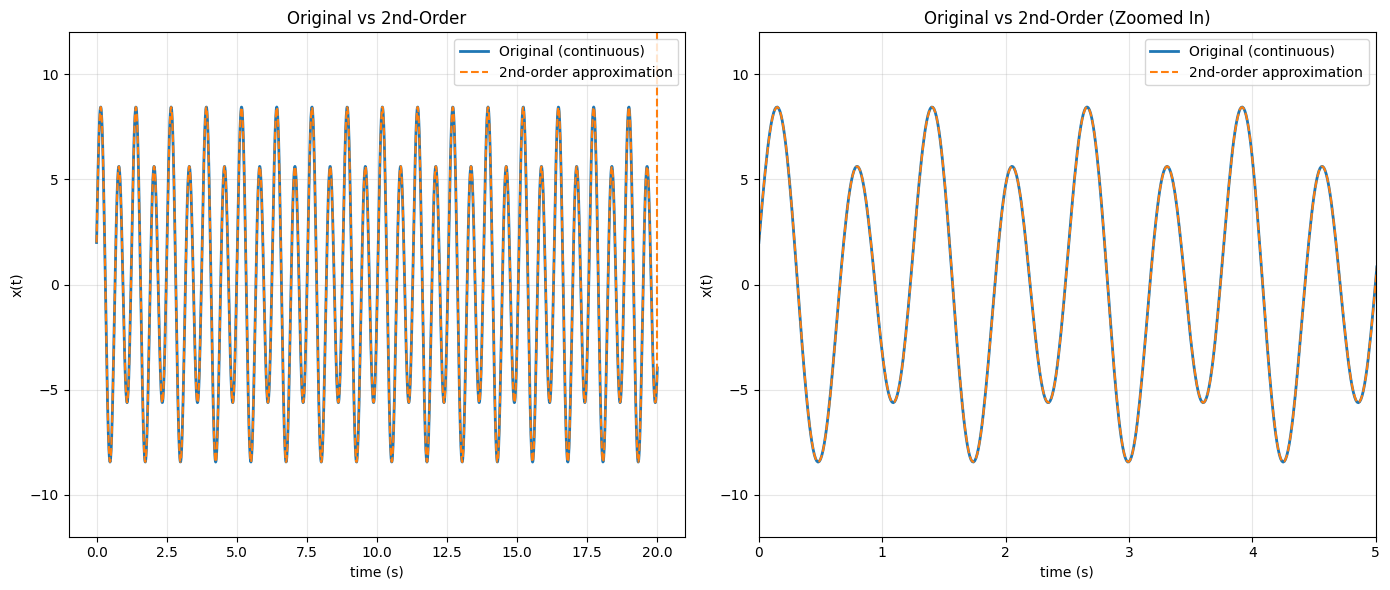

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# (c) Local 2nd-order (quadratic) approximation
def quad_local_reconstruct(t_eval, t_samples, x_samples):
    y = np.empty_like(t_eval, dtype=float)
    N = len(t_samples)

    # For last time point, include it in the last interval mask
    for i in range(N-1):
        if i < N-2:
            mask = (t_eval >= t_samples[i]) & (t_eval < t_samples[i+1])
        else:
            mask = (t_eval >= t_samples[i]) & (t_eval <= t_samples[i+1])

        if not np.any(mask):
            continue

        if i == 0:
            idxs = [0, 1, 2] if N >= 3 else list(range(min(3, N)))
        elif i == N-2:
            idxs = [N-3, N-2, N-1] if N >= 3 else list(range(max(0, N-3), N))
        else:
            idxs = [i-1, i, i+1]

        t_nodes = t_samples[idxs] # time nodes
        x_nodes = x_samples[idxs] # corresponding sample values

        # Fit quadratic and evaluate
        coeffs = np.polyfit(t_nodes, x_nodes, 2)  # degree 2
        y[mask] = np.polyval(coeffs, t_eval[mask]) #

    return y

x_quad = quad_local_reconstruct(t_cont, t_s, x_s)



fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot 1: Full view
axs[0].plot(t_cont, x_c, label="Original (continuous)", lw=2)
axs[0].plot(t_cont, x_quad, label="2nd-order approximation", linestyle="--")
axs[0].set_xlabel("time (s)")
axs[0].set_ylabel("x(t)")
axs[0].set_title("Original vs 2nd-Order")
axs[0].grid(True, alpha=0.3)
axs[0].set_ylim(-12, 12)
axs[0].legend(loc='upper right')

# Plot 2: Zoomed-in view
axs[1].plot(t_cont, x_c, label="Original (continuous)", lw=2)
axs[1].plot(t_cont, x_quad, label="2nd-order approximation", linestyle="--")
axs[1].set_xlabel("time (s)")
axs[1].set_ylabel("x(t)")
axs[1].set_title("Original vs 2nd-Order (Zoomed In)")
axs[1].grid(True, alpha=0.3)
axs[1].set_ylim(-12, 12)
axs[1].set_xlim(0, 5)
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

d) Analyze the results and provide the proper comments.